## Análise das idades dos clientes

<img src="idades1.jpg">

O Banco Vitória (BanVic) preza muito por atender todas as necessidades e questões de seus clientes.
O BanVic sempre foi focado em proporcionar aos clientes experiências bancárias transparentes e convenientes. 
Clientes que são diversos em todas as maneiras, e nessa análise vamos focar na questão da idade dos nossos clientes.

_Antes, uma curiosidade_:

* Luiza Silva é a nossa cliente mais antiga, foi incluída no sistema em 02/02/2010.
* Vitor Almeida é o nosso cliente mais recente, foi incluído no sistema em 27/12/2010.

Foi verificado na nossa base que atualmente temos 998 clientes (**em breve seremos mais de 1 mil!**) e olhando para as idades podemos ver que:

* Maria Sophia da Luz é nossa cliente mais jovem, ela nasceu em 04/04/2007. Se tornou nossa cliente aos 9 anos e hoje tem 16 anos.
* Brenda Cunha e Sarah da Mata são nossas 2 clientes mais idosas, ambas nasceram em 26/07/1942, ou seja, têm 81 anos. Brenda se tornou nossa cliente aos 76 anos. E Sarah se tornou nossa cliente aos 79 anos.

Acompanhe essa análise conosco, vem!

_Importante: Nos cálculos considerou a data 31/12/2023._

In [1]:
# Importando os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# Tamanho dos gráficos
plt.rcParams["figure.figsize"] = [10,5]
# Tamanho dos dados
plt.rcParams["font.size"] = 12

# Lendo o arquivo .CSV
df_idade = pd.read_csv('idade.csv')

In [2]:
df_idade.describe()

,idade
count,998.000000
mean,48.929860
std,18.757896
min,16.000000
25%,33.000000
50%,49.000000
75%,66.000000
max,81.000000


Através da tabela acima podemos tirar algumas conclusões:

* Idade mínima: 16 anos
* Idade máxima: 81 anos
* Alcance: 65 anos (idade máxima menos a mínima)
* Média: 49 anos, aproximadamente
* Mediana: 49 anos (valor central)
* Desvio Padrão: 18,76 - aproximadamente (representando uma amostra bem dispersa)
<br></br>
* Moda: 68 anos - 30 clientes têm essa idade (Fonte: Anexo 1 - Planilha: base_excel.xlsx - Guia: idade_freq)

<img src="idade_freq.JPG">






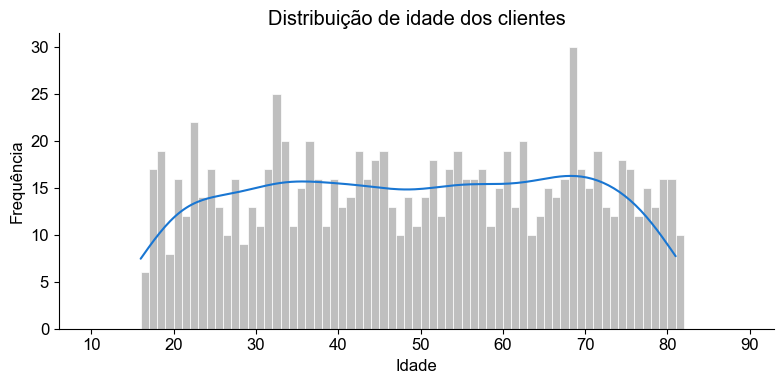

In [3]:
# Define o estilo e o tamanho do gráfico
fig, ax = plt.subplots(figsize = (8,4))
sns.set_style("whitegrid", {'axes.grid' : False})
cor_histograma = "gray"

# Cria o histograma
sns.histplot(data=df_idade, x="idade", kde=True, bins=range(10, 90, 1),  color= cor_histograma)


# Adiciona título e rótulos
ax.set_title("Distribuição de idade dos clientes")
ax.lines[0].set_color('#1976D2')
ax.set_xlabel("Idade", fontsize=12)
ax.set_ylabel("Frequência", fontsize=12)

# Remove a borda superior e direita para limpeza
sns.despine()

plt.tight_layout()

Observando o histograma acima e pela curvatura da linha azul podemos entender que é uma distribuição que se aproxima da distribuição normal.

Pelo achatamento da linha azul, podemos concluir que sua curtose é MENOR QUE 0, isto é, uma curtose platicúrtica.


<Axes: xlabel='idade'>

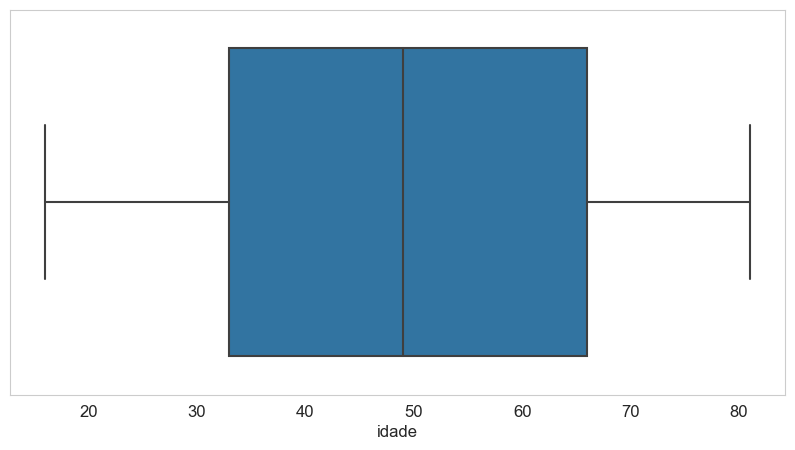

In [4]:
sns.boxplot(data=df_idade, x="idade")

Observando o boxplot acima, podemos ver que é uma distribuição bem padrão, sem outliers e com uma boa simetria entre o primeiro e o segundo quartil. O que mais uma vez é uma característica de uma distribuição normal.

Podemos separa nossos clientes em 3 grandes grupos (Jovens, Adultos e Idosos), conforme códigos abaixo:

~~~sql
SELECT 'Jovens - menos de 30 anos', COUNT(*) AS Qtdade_clientes
FROM clientes 
WHERE EXTRACT(YEAR FROM data_nascimento) > '1993';
~~~
Temos 192 clientes na categoria Jovens - menos de 30 anos.

~~~sql
SELECT 'Adultos - entre 30 e 60 anos', COUNT(*) AS Qtdade_clientes
FROM clientes 
WHERE EXTRACT(YEAR FROM data_nascimento) BETWEEN '1963' AND '1993'; 
~~~
Temos 483 clientes na categoria Adultos - entre 30 e 60 anos.

~~~sql
SELECT 'Idosos - mais de 60 anos', COUNT(*) AS Qtdade_clientes
FROM clientes 
WHERE EXTRACT(YEAR FROM data_nascimento) < '1963'; 
~~~
Temos 323 clientes na categoria Idosos - mais de 60 anos.

Portanto, temos mais Adultos que Idosos, que por sua vez, são mais do que Jovens.

#### Conclusões e recomendações

* Nossos clientes Jovens representam menos da metade de clientes Adultos. Logo, precisamos investir em campanhas para os jovens, de preferência que inclua as redes sociais do momento e os atores/influenciadores condizente com nosso valores e dos clientes que devemos ter.

* Nossa base de Adultos é a maior, e portanto devemos focar nossas campanhas internas nesses clientes, como promoções e serviços que atendam esse público.

* Nossos clientes Idosos também precisam do nosso melhor, com profissionais em agências físicas capacitados para atendê-los e recursos de acessibilidade (muitos já não enxergam tão bem) e melhor UX Design, no nosso site e app, para esse público.
